In [1]:
import scanpy as sc
import numpy as np
import random
import anndata as ad
sc.settings.verbosity = 3
sc.set_figure_params(dpi=100)

age = "P6"
rearing = "NR"

adata = sc.read_h5ad("E:/Transcriptomics_V1/Mouse/P6NR/P6full_glut_v3.h5ad")
adata = adata[adata.obs.Study=='2023 Multiome', :]

C:\Ryan\GitHub\scanpy\scanpy\plotting\_utils.py:429: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[value_to_plot + '_colors'] = colors_list
C:\Ryan\GitHub\scanpy\scanpy\plotting\_tools\scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


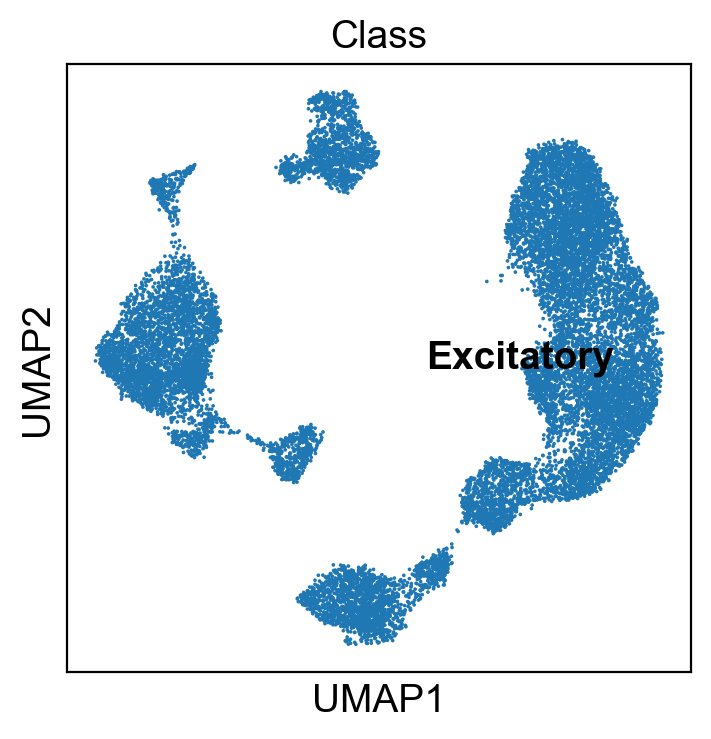

In [2]:
sc.pl.umap(adata, color=["Class"], legend_loc="on data")

C:\Ryan\GitHub\scanpy\scanpy\plotting\_tools\scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


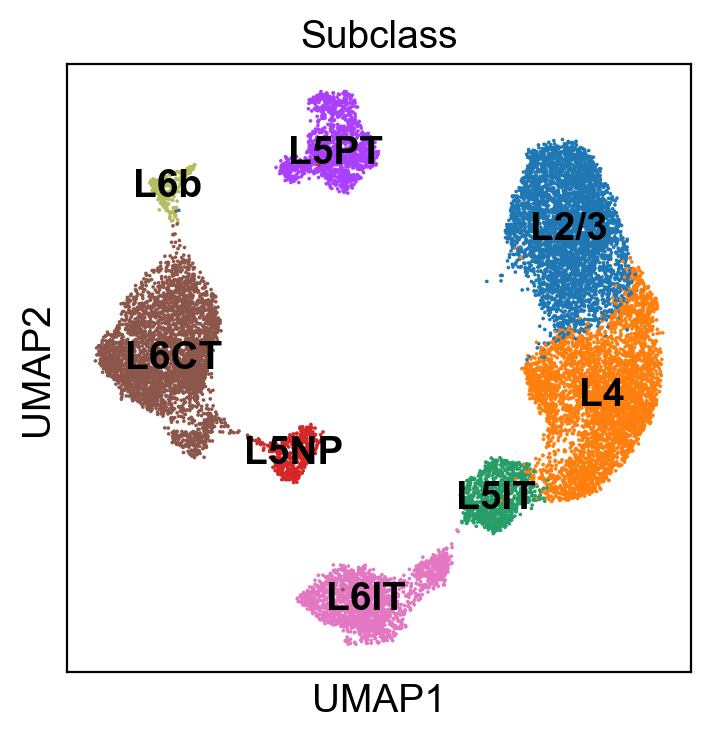

In [3]:
sc.pl.umap(adata, color=["Subclass"], legend_loc="on data")

In [14]:
adata.obs.columns

Index(['Age', 'Class_broad', 'Doublet', 'Doublet Score', 'batch', 'cluster',
       'leiden', 'n_counts', 'n_genes', 'percent_mito', 'sample', 'subclass',
       'C26_decision', 'layer', 'Type', 'Subclass', 'leiden_new', 'P28_Type',
       'Class', 'Sample', 'total_counts', 'pct_counts_mt', 'n_genes_by_counts',
       'total_counts_mt', 'Doublet?', 'P17 Mapping Prob',
       'P6-2022 Mapping Label', 'P6-2022 Mapping Prob',
       'P6-2022 Mapping Label_maj', 'Study', 'leiden_1', 'leiden_1.1',
       'leiden_1.2', 'leiden_1.3', 'leiden_1.4', 'leiden_1.5', 'leiden_1.6',
       'leiden_1.7', 'leiden_1.8', 'leiden_1.9', 'leiden_2', 'Type_maj',
       'Type_leiden', 'idx', 'Type_nn', 'Type_nn_dists', 'Type_annot',
       'Type_annot Prob'],
      dtype='object')

C:\Ryan\GitHub\scanpy\scanpy\plotting\_tools\scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


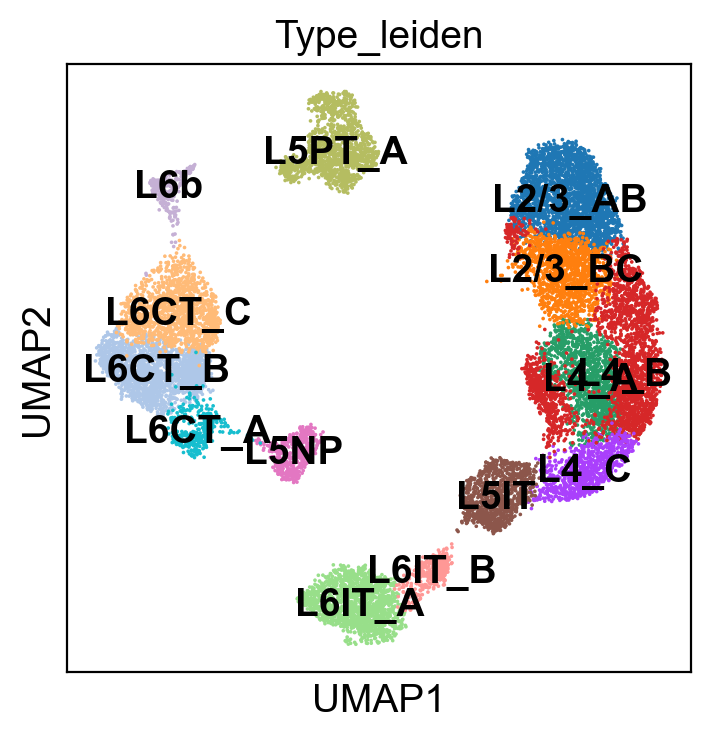

In [19]:
sc.pl.umap(adata, color=["Type_leiden"], legend_loc="on data")

In [14]:
from scipy.sparse import csc_matrix
from scipy.io import mmwrite
import gzip
import shutil
import pandas as pd

def compress_file(input_filename, output_filename):
    with open(input_filename, 'rb') as f_in:
        with gzip.open(output_filename, 'wb') as f_out:
            shutil.copyfileobj(f_in, f_out)
   
for sample in np.unique(adata.obs["Sample"]):
    temp_adata = adata[adata.obs["Sample"] == sample, :].copy()
    temp_adata.obs.index = [bc[:18] for bc in temp_adata.obs.index.to_list()]
    path = "E:/Transcriptomics_V1/Mouse/{0}{1}/filtered_feature_bc_matrix/".format(age, rearing) + sample + "/"
    # print(temp_adata)
    # print(np.unique(temp_adata.obs[["Subclass"]]))
    # bcs = [bc.replace("-P8_glut-0-0", "") for bc in temp_adata.obs.index.to_list()]
    # bcs = [bc[:29] for bc in temp_adata.obs.index.to_list()]
    # bcs = [bc[:29] for bc in counts.index.to_list() if sample in bc]
    # gns = temp_adata.var.index.to_list()
    # X = counts.loc[bcs][gns]
    # mmwrite(path + "matrix.mtx", csc_matrix(X.values, dtype=np.int64).T, precision=1)
    # X.columns.to_frame().to_csv(path + "features.tsv", index=False, header=False)
    # X.index.to_frame().to_csv(path + "barcodes.tsv", index=False, header=False)
    # Save class
    Class = pd.DataFrame(np.nan, index=temp_adata.obs.index, columns=["Class"])
    Class["Class"] = temp_adata.obs[["Class"]]
    Class["Class"] = pd.Categorical(Class["Class"], categories=list(np.unique(temp_adata.obs[["Class"]])) + ["ambiguous"])
    Class.loc[Class["Class"].isnull(), "Class"] = "ambiguous"
    Class.to_csv(path + "class.csv", index=True, header=False)
    # Save subclass
    Subclass = pd.DataFrame(np.nan, index=temp_adata.obs.index, columns=["Subclass"])
    Subclass["Subclass"] = temp_adata.obs[["Subclass"]]
    Subclass["Subclass"] = pd.Categorical(Subclass["Subclass"], categories=list(np.unique(temp_adata.obs[["Subclass"]])) + ["ambiguous"])
    Subclass.loc[Subclass["Subclass"].isnull(), "Subclass"] = "ambiguous"
    # print(np.unique(Subclass[["Subclass"]]))
    Subclass.to_csv(path + "subclass.csv", index=True, header=False)
    # Save type
    Type = pd.DataFrame(np.nan, index=temp_adata.obs.index, columns=["Type_maj"])
    Type["Type_maj"] = temp_adata.obs[["Type_maj"]]
    Type["Type_maj"] = pd.Categorical(Type["Type_maj"], categories=list(np.unique(temp_adata.obs[["Type_maj"]])) + ["ambiguous"])
    Type.loc[Type["Type_maj"].isnull(), "Type_maj"] = "ambiguous"
    Type.to_csv(path + "type.csv", index=True, header=False)
    # for fl in ["matrix.mtx", "features.tsv", "barcodes.tsv"]:
    #     compress_file(path + fl, path + fl + ".gz")